# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [875]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

zsh:1: command not found: kaggle
unzip:  cannot find or open traffic-dataset.zip, traffic-dataset.zip.zip or traffic-dataset.zip.ZIP.


In [876]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [877]:
# Loading the dataset with Date column parsed as datetime
df = pd.read_csv('Traffic_Data.csv', parse_dates=['date_time'], dayfirst=True)


df.head()


/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_18074/1201397299.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('Traffic_Data.csv', parse_dates=['date_time'], dayfirst=True)


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [878]:
df.set_index('date_time', inplace=True)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

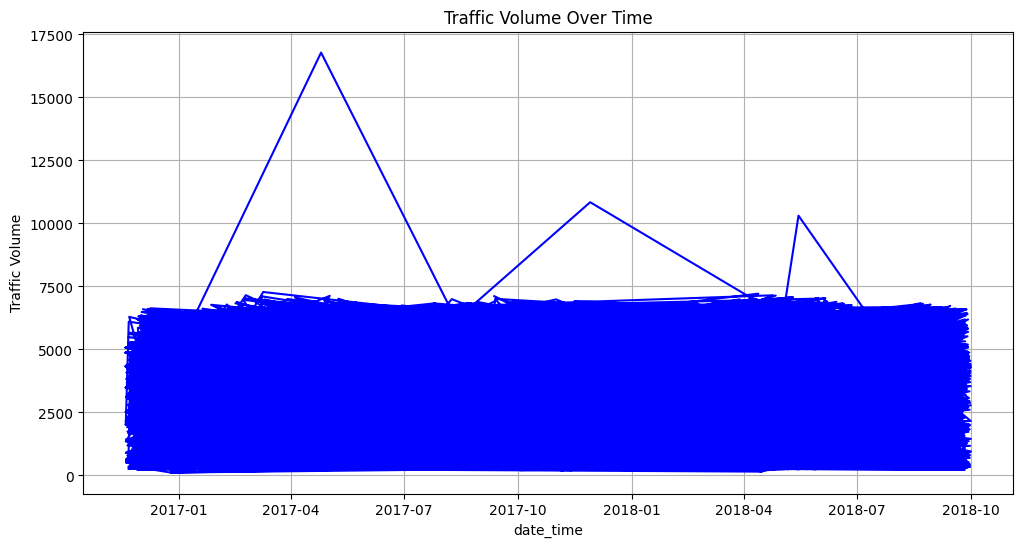

In [879]:
plt.figure(figsize=(12, 6))
plt.plot(df['traffic_volume'], color='blue')
plt.title('Traffic Volume Over Time')
plt.xlabel('date_time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [880]:
df.sort_values(by='date_time', inplace=True)


In [881]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n") 

'traffic_volume': [4872. 5074. 4328. ... 1359. 2036. 1826.]

'temp': [274.08 273.84 273.62 ... 283.03 284.2  282.12]

'rain_1h': [ 0.    1.02  1.27  0.25  0.51  0.98  0.42  0.38  2.41  2.03  4.    5.84
  2.76  2.2   2.88  1.82  5.62  2.86  0.76  1.78  0.63  5.08  0.93  1.15
  4.06  1.85  1.52  2.79  1.1   0.61  0.89  0.43  0.71  1.4   0.85  0.81
  3.94  3.4   0.64  0.34  0.44  0.32  2.62  0.69  1.21  1.14  2.61  1.6
  2.92  3.1   2.6   1.45  2.26  1.06  0.28  0.29  3.3   3.05  2.29  2.54
  2.85  3.45  2.48  0.3   0.35  2.16  1.72  1.68  5.12  3.18  1.01  1.86
  1.65  0.8   1.66  1.3   0.86  4.15  4.79  5.42  5.19  9.62 10.6   7.11
  2.96  4.74  0.66]

'snow_1h': [0.]

'clouds_all': [90 40  1 75 20  5 64 80 76  0  8 12 32 68 92 88 24 36 48 44 56]

'weather_main': ['Snow' 'Fog' 'Mist' 'Haze' 'Clouds' 'Clear' 'Rain' 'Drizzle'
 'Thunderstorm' 'Smoke']

'weather_description': ['heavy snow' 'fog' 'mist' 'light snow' 'haze' 'overcast clouds'
 'sky is clear' 'broken clouds' 'scattered clouds' 

In [882]:
df['traffic_volume'] = pd.to_numeric(df['traffic_volume'], errors='coerce')

In [883]:

df_copy = df.reset_index(drop=True)


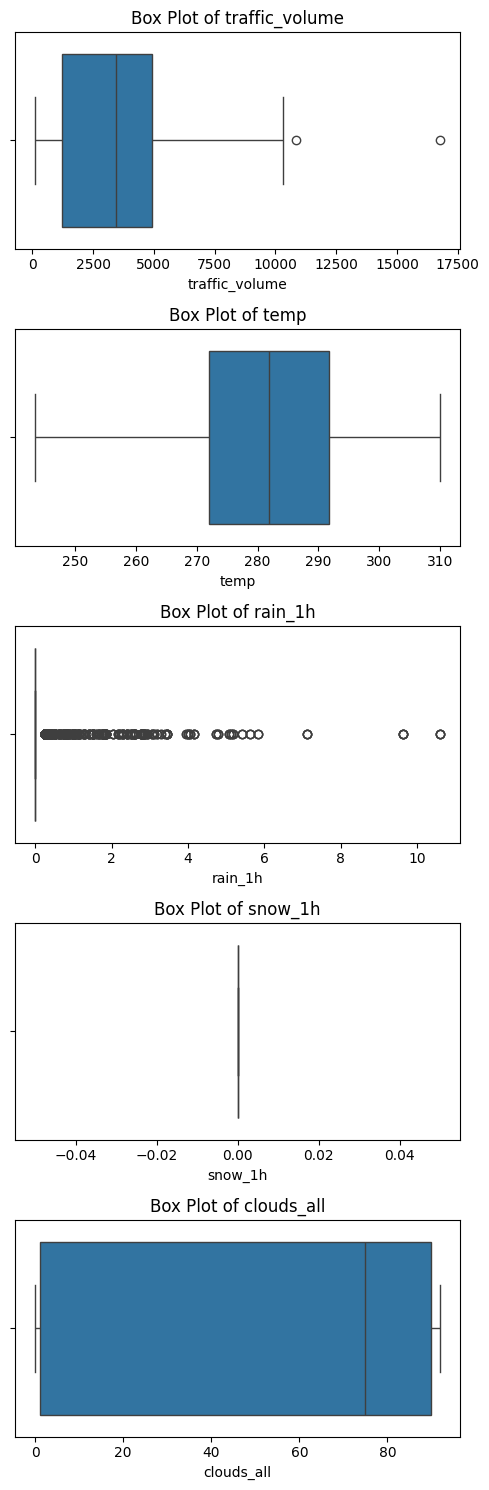

In [884]:

numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(5, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df_copy[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [885]:
# Removing outliers using the IQR method

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


df = remove_outliers(df, 'traffic_volume')
df = remove_outliers(df, 'rain_1h')


In [886]:
df.columns.duplicated().sum()


0

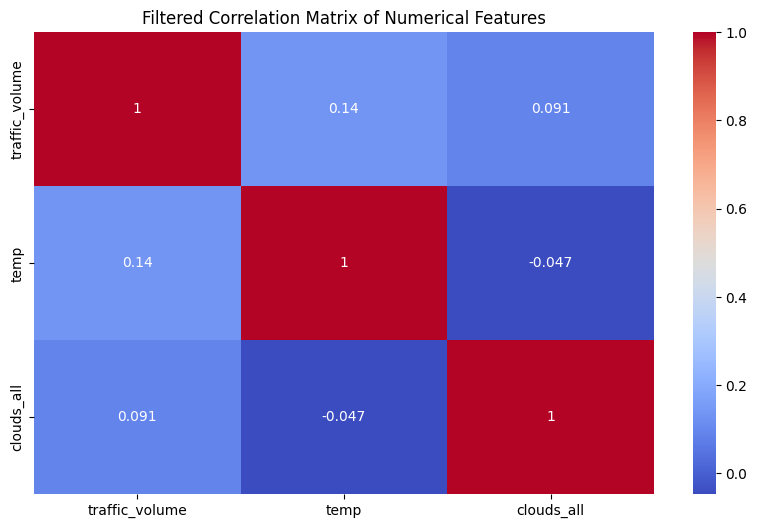

In [887]:
# Selecting numerical columns as a DataFrame, not just the column names
numerical_cols = df.select_dtypes(include=['number'])

# Dropping low variance columns 
numerical_cols_filtered = numerical_cols.loc[:, numerical_cols.var() > 0.01]

correlation_matrix = numerical_cols_filtered.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Filtered Correlation Matrix of Numerical Features')
plt.show()


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [888]:
df.isnull().sum()

traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19265 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19265 non-null  float64
 1   temp                 19265 non-null  float64
 2   rain_1h              19265 non-null  float64
 3   snow_1h              19265 non-null  float64
 4   clouds_all           19265 non-null  int64  
 5   weather_main         19265 non-null  object 
 6   weather_description  19265 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [890]:
# Initializing the KNNImputer
from sklearn.impute import KNNImputer

traffic_volume = df[['traffic_volume']]

imputer = KNNImputer(n_neighbors=4)

# imputation only on the traffic_volume column
traffic_volume_imputed = pd.DataFrame(imputer.fit_transform(traffic_volume), columns=['traffic_volume'], index=traffic_volume.index)

df['traffic_volume'] = traffic_volume_imputed['traffic_volume']

In [891]:
df.isnull().sum()

traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

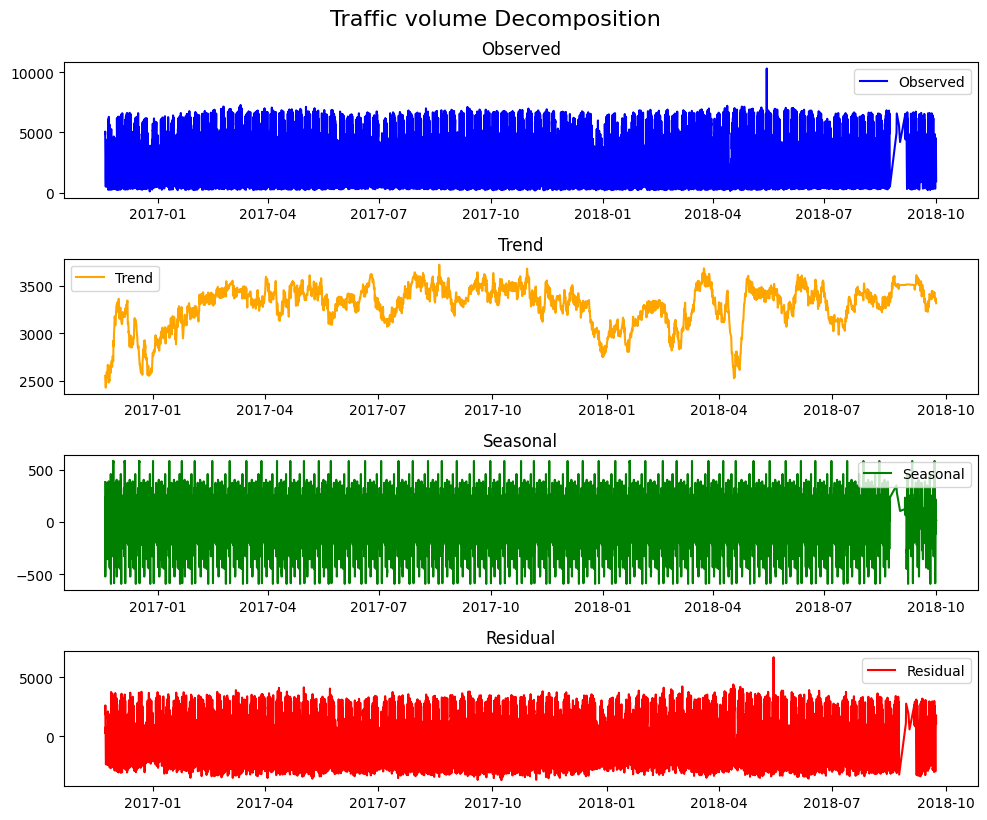

In [892]:
decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=365)

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='best')
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='best')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='best')
plt.title('Residual')

plt.tight_layout()
plt.suptitle('Traffic volume Decomposition', fontsize=16, y=1.02)
plt.show()

In [893]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


In [894]:
data_numeric = df.select_dtypes(include=['number']).resample('D').mean()

In [895]:
duplicates = df.index.duplicated()
print(f"Number of duplicate timestamps: {duplicates.sum()}")

#  Aggregating duplicates 
df = df.groupby(df.index).first()  

data_categorical = df.select_dtypes(exclude=['number']).resample('D').ffill()



Number of duplicate timestamps: 3410


In [896]:
# combining it with numeric data 
df = pd.concat([data_numeric, data_categorical], axis=1)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [897]:
df['lag_1'] = df['traffic_volume'].shift(1)

In [898]:
df['rolling_mean_7'] = df['traffic_volume'].rolling(window=7).mean()  # 7-day moving average
df['rolling_mean_30'] = df['traffic_volume'].rolling(window=30).mean()  # 30-day moving average


In [899]:
df['diff_1'] = df['traffic_volume'].diff(1)  # First difference to remove trend


In [900]:
df = df.sort_index()

In [901]:
df['Day_of_Week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['Month'] = df.index.month  # Month number
df['Day_of_Year'] = df.index.dayofyear  # Day of the year
df['IsWeekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekends (Saturday, Sunday), 0 for weekdays


In [902]:
df['traffic_volume_change'] = df['traffic_volume'].diff()


In [903]:
df.isnull().sum()


traffic_volume            8
temp                      8
rain_1h                   8
snow_1h                   8
clouds_all                8
weather_main              1
weather_description       1
lag_1                     9
rolling_mean_7           23
rolling_mean_30          66
diff_1                   12
Day_of_Week               0
Month                     0
Day_of_Year               0
IsWeekend                 0
traffic_volume_change    12
dtype: int64

In [904]:
df = df.dropna()

In [905]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 616 entries, 2016-12-17 to 2018-08-24
Freq: D
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   traffic_volume         616 non-null    float64
 1   temp                   616 non-null    float64
 2   rain_1h                616 non-null    float64
 3   snow_1h                616 non-null    float64
 4   clouds_all             616 non-null    float64
 5   weather_main           616 non-null    object 
 6   weather_description    616 non-null    object 
 7   lag_1                  616 non-null    float64
 8   rolling_mean_7         616 non-null    float64
 9   rolling_mean_30        616 non-null    float64
 10  diff_1                 616 non-null    float64
 11  Day_of_Week            616 non-null    int32  
 12  Month                  616 non-null    int32  
 13  Day_of_Year            616 non-null    int32  
 14  IsWeekend              616 non-

In [906]:
df['weather_main'].unique()

array(['Mist', 'Clear', 'Drizzle', 'Snow', 'Clouds', 'Haze', 'Fog',
       'Rain', 'Thunderstorm'], dtype=object)

In [907]:

df['weather_description'].unique()


array(['mist', 'sky is clear', 'light intensity drizzle', 'light snow',
       'broken clouds', 'haze', 'scattered clouds', 'overcast clouds',
       'fog', 'drizzle', 'light rain', 'Sky is Clear',
       'heavy intensity rain', 'proximity thunderstorm', 'snow',
       'thunderstorm', 'moderate rain', 'thunderstorm with heavy rain',
       'few clouds', 'thunderstorm with light rain',
       'proximity thunderstorm with rain'], dtype=object)

In [908]:
df.drop(columns=['weather_description'], inplace=True)

In [909]:
from sklearn.preprocessing import OneHotEncoder


df = pd.get_dummies(df, columns=['weather_main'], drop_first=True)
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,lag_1,rolling_mean_7,rolling_mean_30,diff_1,Day_of_Week,...,IsWeekend,traffic_volume_change,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-17,1696.725000,258.220500,0.0,0.0,64.500000,2682.871795,2998.097981,3003.375371,-986.146795,5,...,1,-986.146795,False,False,False,False,True,False,False,False
2016-12-18,1948.434783,249.040000,0.0,0.0,4.739130,1696.725000,3004.322180,2955.089864,251.709783,6,...,1,251.709783,False,False,False,False,False,False,False,False
2016-12-19,3223.846154,262.900000,0.0,0.0,18.923077,1948.434783,2956.732533,2972.206958,1275.411371,0,...,0,1275.411371,False,False,False,False,False,False,False,False
2016-12-20,3622.130435,272.243478,0.0,0.0,13.304348,3223.846154,2954.280928,3018.561305,398.284281,1,...,0,398.284281,False,False,False,False,False,False,False,False
2016-12-21,3558.416667,273.563333,0.0,0.0,60.333333,3622.130435,2910.007119,3028.319639,-63.713768,2,...,0,-63.713768,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,3828.750000,294.791000,0.0,0.0,53.375000,2774.916667,3480.546905,3363.895862,1053.833333,0,...,0,1053.833333,False,False,False,False,False,True,False,False
2018-08-21,3637.291667,292.030708,0.0,0.0,55.833333,3828.750000,3467.285000,3396.350029,-191.458333,1,...,0,-191.458333,True,False,False,False,False,False,False,False
2018-08-22,3695.583333,292.295417,0.0,0.0,7.125000,3637.291667,3477.790952,3408.117251,58.291667,2,...,0,58.291667,False,False,False,False,False,False,False,False


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [910]:
df.sort_values(by='date_time', inplace=True)

train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]


features = [col for col in df.columns if col not in ['date_time', 'traffic_volume']]
X_train, y_train = train[features], train['traffic_volume']
X_test, y_test = test[features], test['traffic_volume']


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [911]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [912]:
look_back = 24  # the look-back period

num_samples_train = (X_train_scaled.shape[0] // look_back) * look_back
num_samples_test = (X_test_scaled.shape[0] // look_back) * look_back

X_train_lstm = X_train_scaled[:num_samples_train].reshape((-1, look_back, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled[:num_samples_test].reshape((-1, look_back, X_test_scaled.shape[1]))

y_train_lstm = y_train[look_back:num_samples_train]
y_test_lstm = y_test[look_back:num_samples_test]


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [913]:
# ARIMA

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [914]:
!pip install pmdarima

In [915]:
from statsmodels.tsa.arima.model import ARIMA

p = 5  # Number of lag observations included in the model
d = 1  # Number of times that the raw observations are differenced
q = 0  # Size of the moving average window

# Fitting the model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_model_fit = arima_model.fit()

# Forecast on the test set
arima_preds = arima_model_fit.forecast(steps=len(y_test))

In [916]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,lag_1,rolling_mean_7,rolling_mean_30,diff_1,Day_of_Week,...,IsWeekend,traffic_volume_change,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-17,1696.725000,258.220500,0.0,0.0,64.500000,2682.871795,2998.097981,3003.375371,-986.146795,5,...,1,-986.146795,False,False,False,False,True,False,False,False
2016-12-18,1948.434783,249.040000,0.0,0.0,4.739130,1696.725000,3004.322180,2955.089864,251.709783,6,...,1,251.709783,False,False,False,False,False,False,False,False
2016-12-19,3223.846154,262.900000,0.0,0.0,18.923077,1948.434783,2956.732533,2972.206958,1275.411371,0,...,0,1275.411371,False,False,False,False,False,False,False,False
2016-12-20,3622.130435,272.243478,0.0,0.0,13.304348,3223.846154,2954.280928,3018.561305,398.284281,1,...,0,398.284281,False,False,False,False,False,False,False,False
2016-12-21,3558.416667,273.563333,0.0,0.0,60.333333,3622.130435,2910.007119,3028.319639,-63.713768,2,...,0,-63.713768,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-20,3828.750000,294.791000,0.0,0.0,53.375000,2774.916667,3480.546905,3363.895862,1053.833333,0,...,0,1053.833333,False,False,False,False,False,True,False,False
2018-08-21,3637.291667,292.030708,0.0,0.0,55.833333,3828.750000,3467.285000,3396.350029,-191.458333,1,...,0,-191.458333,True,False,False,False,False,False,False,False
2018-08-22,3695.583333,292.295417,0.0,0.0,7.125000,3637.291667,3477.790952,3408.117251,58.291667,2,...,0,58.291667,False,False,False,False,False,False,False,False


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [917]:

# Evaluate the model
from sklearn.metrics import mean_squared_error


arima_mse = mean_squared_error(test['traffic_volume'], arima_preds)
print(f'ARIMA Model MSE: {arima_mse}')

ARIMA Model MSE: 331649.97558013385


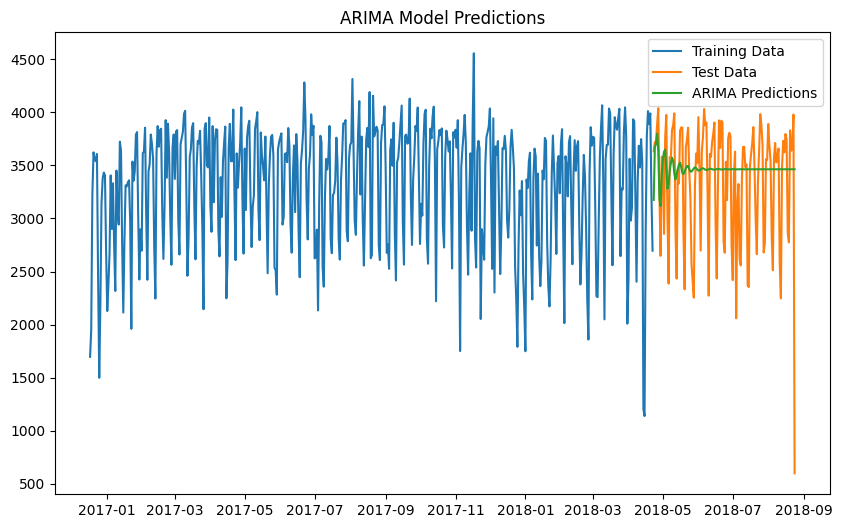

In [918]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['traffic_volume'], label='Training Data')
plt.plot(test.index, test['traffic_volume'], label='Test Data')
plt.plot(test.index, arima_preds, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()

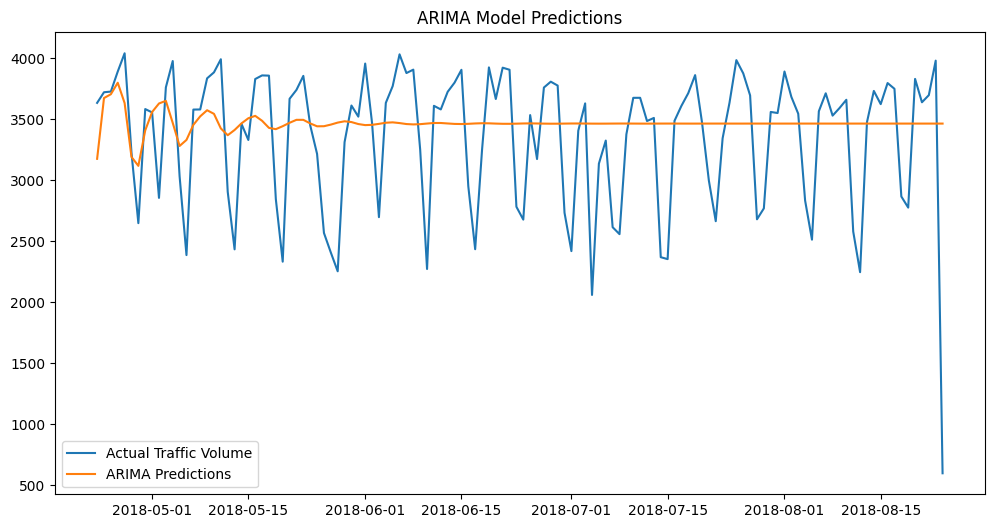

In [919]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Traffic Volume')
plt.plot(test.index, arima_preds, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [920]:

import numpy as np


def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        y.append(data[i + look_back, 0])  #since the target is the first column (traffic_volume)
    return np.array(X), np.array(y)

# Generatinh sequences for LSTM
look_back = 48

X_train_lstm, y_train_lstm = create_sequences(X_train_scaled, look_back)
X_test_lstm, y_test_lstm = create_sequences(X_test_scaled, look_back)

X_train_lstm.shape

(444, 48, 21)

In [921]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))



/Users/rakanalrasheed/my-jupyter-venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [922]:

import tensorflow as tf


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


In [923]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 48, 50)         │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 48, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,651 (135.36 KB)

 Trainable params: 34,651 (135.36 KB)

 Non-trainable params: 0 (0.00 B)

In [924]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [925]:
# Train the model
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])



Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1551 - val_loss: 0.1119
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0372 - val_loss: 0.0201
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0254 - val_loss: 0.0113
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0193 - val_loss: 0.0081
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0172 - val_loss: 0.0086
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0149 - val_loss: 0.0098
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0141 - val_loss: 0.0061
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0121 - val_loss: 0.0135
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0147 - val_loss: 0.0163
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0134 - val_loss: 0.0046
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [926]:

lstm_preds = model.predict(X_test_lstm)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [927]:
# Adjusting y_test to match the length of lstm_preds
y_test_adjusted = y_test[-len(lstm_preds):]

# evaluating the model
lstm_mse = mean_squared_error(y_test_adjusted, lstm_preds)
print(f'LSTM Model MSE: {lstm_mse}')


LSTM Model MSE: 11238116.314327331


In [928]:
lstm_preds = lstm_preds.flatten()
# Adjusting test index to match the length of lstm_preds
test_index_adjusted = test.index[-len(lstm_preds):]
# used for debugging


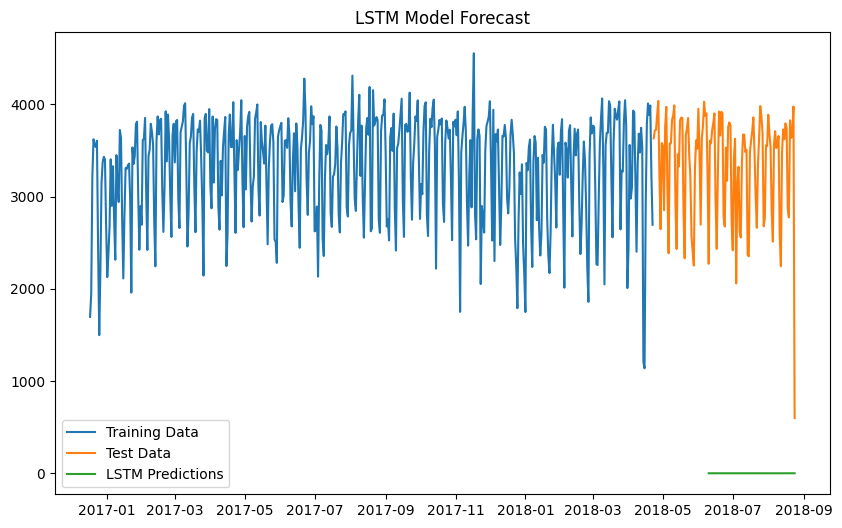

In [929]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['traffic_volume'], label='Training Data')
plt.plot(test.index, test['traffic_volume'], label='Test Data')
plt.plot(test_index_adjusted, lstm_preds, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()

In [930]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Build the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(look_back, X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/Users/rakanalrasheed/my-jupyter-venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [931]:
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.1397 - val_loss: 0.1414
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0479 - val_loss: 0.0231
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0277 - val_loss: 0.0218
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0248 - val_loss: 0.0144
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0205 - val_loss: 0.0084


In [932]:
# predictions
gru_preds = model.predict(X_test_lstm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [933]:
gru_mse = mean_squared_error(y_test_lstm, gru_preds)
print(f'GRU Model MSE: {gru_mse}')

GRU Model MSE: 0.14139307365391413


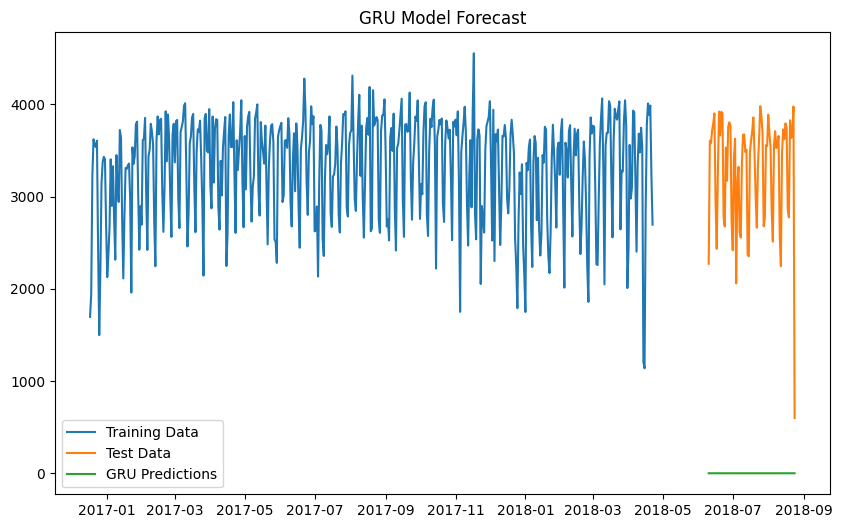

In [934]:

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['traffic_volume'], label='Training Data')
plt.plot(test.index[look_back:], test['traffic_volume'][look_back:], label='Test Data')
plt.plot(test.index[look_back:], gru_preds, label='GRU Predictions')
plt.legend()
plt.title('GRU Model Forecast')
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

**1**: At first I used KNN imputer to handle missing values, filling based on nearby values, then scaled all numeric with MinMax to get the feateues on a same range. Models need this because they are sensetive to different scales in the data. I also have cut out the outliers using IQR. Desptite this careful processing, predictions were still pretty off, probably due to some deeper data issues or missing features. 

**2**: I performed it by adding lag features, rolling averages, and tried encoding weather with one hot encoding. These were supposed to help the models see patterns over time, but even with all of this, the results didn't improve much. It makes me think the either the features weren't capturing what's important, or the models just couldn't handle the complexity. 

**3**: I tried LSTM, GRU, and ARIMA. For LSTM and GRU, i went with two layers of 50 units, droput to avoid overfitting. These models are supposed to be good for time series, but none of them really worked here, even after fine tuning. 

**4**: I picked a batch size of 32 and trained for 20-50 epoch using Adam, which usually works well for RNNs. I tweaked these settings but imporvement were barely there. 

**5**: I used MSE since it penalizes big errors, which is key in forecasting. We wanted the model to focus on avoiding major issues. Even tho the MSE looked low, the actual predictions were way off-totally flat. 

**6**: I played around with look-back period, layer count, and other hyperparameters. Nothing seemed to help. It kinda confirmed that probably the data or features need rethinking. 

**7**: I saw both, the model either underfit with flat predictions or overfit by catching small details. I added droput and tried making the model more complex as well. 

**8**: First thing i would do is better feature extraction or adding external data like events would help too, as well as making sure the data is correct and all the feature's values were correct so the model can see a pattern. We could also look into hybrid models mixing traditional time series and deep learning. Trying ensemble methods could also help balance out predictions and capture more complex patterns. 